In [1]:
# MODULE IMPORTS ----

from copy import deepcopy

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

In [2]:
#t = np.arange(0, 10, 0.01)

In [3]:
def dyn_v(t = np.arange(0, 10, 0.001), 
          init_p = 0, 
          fix_point = 1, 
          slope = 2):
    
    dt = t[1] - t[0]
    pos = np.zeros(t.shape[0])
    pos[0] = init_p
    for i in range(t.shape[0] - 1):
        pos[i + 1] += pos[i] + slope * (fix_point - pos[i]) * dt
    return pos

In [4]:
def dyn_v_analytic(t = np.arange(0, 10, 0.001),
                   init_p = 0,
                   fix_point = 1,
                   slope = 2):
    
    return (init_p - fix_point)*np.exp(- (slope * t)) + fix_point

In [5]:
out = dyn_v()
out_analytic = dyn_v_analytic()

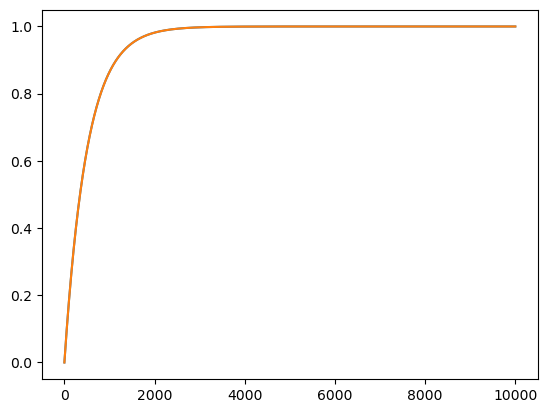

In [6]:
plt.plot(out)
plt.plot(out_analytic)
plt.show()

In [8]:
def v_traj(t = np.arange(0, 10, 0.001),
           v = 1,
           init_p_t = 1,
           init_p_d = 1,
           slope_t = 1,
           slope_d = 1,
           fixed_p_t = 1,
           fixed_p_d = 0,
           alpha_t = 2.5,
           alpha_d = 2.5,
           coherence_t = 1,
           coherence_d = -1):
    
    w_t = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                init_p = init_p_t,
                fix_point = fixed_p_t,
                slope = slope_t)
    
    w_d = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                init_p = init_p_d,
                fix_point = fixed_p_d,
                slope = slope_d)
    
    v_t = v + (w_t * np.tanh(alpha_t * coherence_t) / np.tanh(alpha_t)) + (w_d * np.tanh(alpha_d * coherence_d) / np.tanh(alpha_d))
    
    tan_t = np.tanh(alpha_t * coherence_t) / np.tanh(alpha_t)
    tan_d = np.tanh(alpha_d * coherence_d) / np.tanh(alpha_d)
    
    return v_t, w_t, w_d, tan_t, tan_d

In [81]:
def v_traj_alpha(t = np.arange(0, 10, 0.001),
           v = 1,
           init_p_t = 0,
           init_p_d = 0,
           slope_t = 1,
           slope_d = 1,
           fixed_p_t = 1,
           fixed_p_d = -1,
           alpha = 2.5,
           coherence_t = 1.5,
           coherence_d = 1.5):
    
    w_t = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                init_p = init_p_t,
                fix_point = fixed_p_t,
                slope = slope_t)
    
    w_d = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                init_p = init_p_d,
                fix_point = fixed_p_d,
                slope = slope_d)
    
    v_t = v + (w_t * np.tanh(alpha * coherence_t) / np.tanh(alpha)) + (w_d * np.tanh(alpha * coherence_d) / np.tanh(alpha))
    
    return v_t, w_t, w_d

In [7]:
def v_traj_linear(t = np.arange(0, 10, 0.001),
                  v = 1,
                  init_p_t = 0,
                  init_p_d = 0,
                  slope_t = 1,
                  slope_d = 1,
                  fixed_p_t = 1,
                  coherence_t = 1.5,
                  coherence_d = 1.5):
    
    w_t = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                         init_p = init_p_t,
                         fix_point = fixed_p_t,
                         slope = slope_t)
    
    w_d = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                         init_p = init_p_d,
                         fix_point = 0,
                         slope = slope_d)
    
    v_t = v + (w_t * coherence_t) + (w_d * coherence_d)
    
    return v_t, w_t, w_d

In [8]:
def dyn_v_analytic(t = np.arange(0, 10, 0.001),
                   init_p = 0,
                   fix_point = 1,
                   slope = 2):
    
    return (init_p - fix_point)*np.exp(- (slope * t)) + fix_point

def v_traj_linear_no_v(t = np.arange(0, 10, 0.001),
                       init_p_t = 0,
                       init_p_d = 0,
                       slope_t = 1,
                       slope_d = 1,
                       fixed_p_t = 1,
                       coherence_t = 1.5,
                       coherence_d = 1.5):
    
    w_t = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                         init_p = init_p_t,
                         fix_point = fixed_p_t,
                         slope = slope_t)
    
    w_d = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                         init_p = init_p_d,
                         fix_point = 0,
                         slope = slope_d)
    
    v_t = (w_t * coherence_t) + (w_d * coherence_d)
    
    return v_t, w_t, w_d

In [ ]:
def v_traj_alpha(t = np.arange(0, 10, 0.001),
                 v = 1,
                 init_p_t = 0,
                 init_p_d = 0,
                 slope_t = 1,
                 slope_d = 1,
                 fixed_p_t = 1,
                 alpha = 2.5,
                 coherence_t = 1.5,
                 coherence_d = 1.5):
    
    w_t = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                init_p = init_p_t,
                fix_point = fixed_p_t,
                slope = slope_t)
    
    w_d = dyn_v_analytic(t = np.arange(0, 10, 0.001),
                init_p = init_p_d,
                fix_point = 0,
                slope = slope_d)
    
    v_t = v + (w_t * np.tanh(alpha * coherence_t) / np.tanh(alpha)) + (w_d * np.tanh(alpha * coherence_d) / np.tanh(alpha))
    
    return v_t, w_t, w_d

In [ ]:
def v_traj_for_training(t = np.arange(0, 10, 0.001),
                        v = 1,
                        slope_t = 1,
                        slope_d = 1,
                        fix_p_t = ,
                        fix_p_d = ,
                        init_p_t = ,
                        init_p_d = ,
                        scalar_t = 1,
                        scalar_d = -1,
                        )

In [9]:
v_t, w_t, w_d, tan_t, tan_d = v_traj(v = 0, 
                                     coherence_t = -1.0, 
                                     coherence_d = 1.0,
                                     fixed_p_t = 3,
                                     fixed_p_d = 0,
                                     slope_t = 0.1, 
                                     slope_d = 3, 
                                     init_p_t = 1, 
                                     init_p_d = 2)

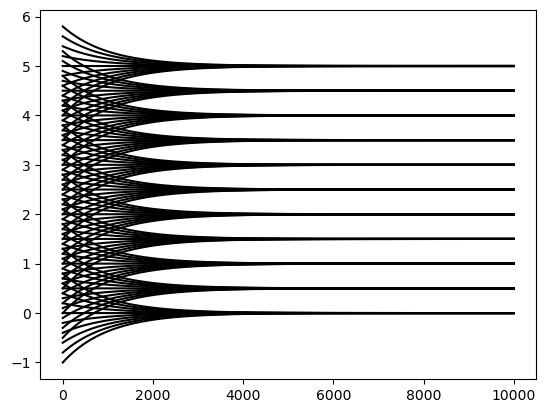

In [70]:
for coh_t in np.arange(0, 1.1, 0.1):
    for coh_d in np.arange(-1, 1, 0.2):
        v_t, w_t, w_d = v_traj_linear_no_v(coherence_t = coh_t,
                                           coherence_d = coh_d,
                                           init_p_d = 1,
                                           init_p_t = 5,
                                           fixed_p_t = 5,
                                           slope_t = 5.,
                                           slope_d = 1.)
        #print(coh_t * coh_d)
        plt.plot(v_t, color = 'black') # alpha = np.abs(coh_t * coh_d) )
plt.show()

In [60]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

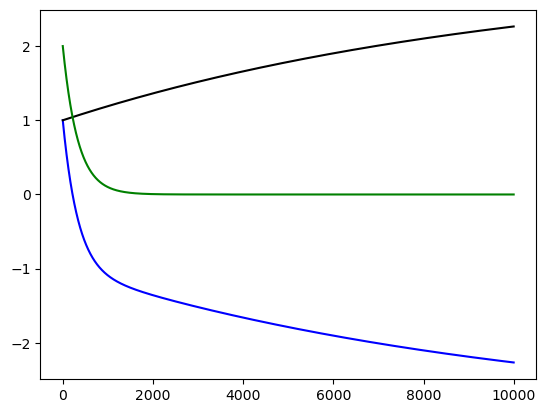

In [10]:



plt.plot(v_t, color = 'blue')
plt.plot(w_t, color = 'black')
plt.plot(w_d, color = 'green')
plt.show()

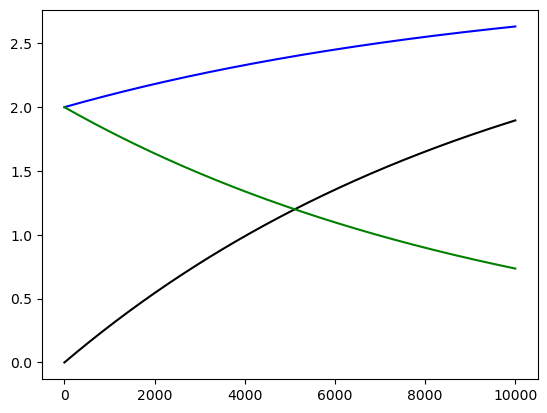

In [118]:
plt.plot(v_t, color = 'blue')
plt.plot(w_t * tan_t, color = 'black')
plt.plot(w_d * tan_d, color = 'green')
plt.show()

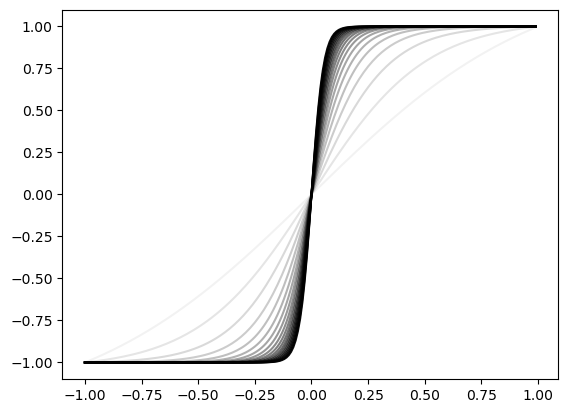

In [17]:
alpha_max = 20
for alpha in np.arange(0.0001, alpha_max, 1):
    plt.plot(np.arange(-1, 1, 0.01), np.tanh(alpha * np.arange(-1, 1, 0.01)) / np.tanh(alpha), alpha = alpha / alpha_max, color = 'black')
plt.show()

In [22]:
out_larger_2 = []
for i in np.arange(2, 50, 0.1):
    out = dyn_v(init_p = i)
    out_larger_2.append(np.sum(out > 2))

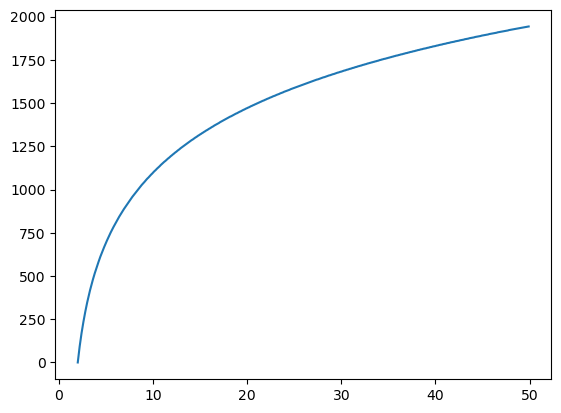

In [24]:
plt.plot(np.arange(2, 50, 0.1), out_larger_2)
plt.show()